In [9]:
# initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram


IBMQ.save_account('ad3965ae3913db06521d71bba9e1208319b91a9e7ab869744cd624d63a8e898cfef58312e0819dcc2a1a2ffa59a867a4fdf5f6e225c6f2c80f28e03d3bb1a61a',overwrite=True)

#IBMQ.save_account('ebadbf7da56bb61d559a2f5fecd3d1d6e60d13ce5dd374f801829f3c92cd864b124e1ad5c1fd3faa6a14a5365f9d326947df8db138604049b06192da43d6a49b',overwrite=True)

#IBMQ.save_account('676f27667e5b533a92387a7716d67080d9648d217e96873f767e3834c2861bd4590a7ffbff31002cbce3f215642436c9a2e3a731e24b797ed5acd92765a463c2',overwrite=True)
#IBMQ.save_account('ebadbf7da56bb61d559a2f5fecd3d1d6e60d13ce5dd374f801829f3c92cd864b124e1ad5c1fd3faa6a14a5365f9d326947df8db138604049b06192da43d6a49b',overwrite=True)



IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends() 

ibmqfactory.load_account:WARNING:2020-08-05 18:09:31,915: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [10]:
from qiskit import *

In [11]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal,CompleteMeasFitter)

In [12]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [13]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal,CompleteMeasFitter)


n=1
qr = QuantumRegister(n)
cr = ClassicalRegister(n)
    
circuit = QuantumCircuit(qr, cr)
barriers = True


            # Apply Hadamard gate
circuit.h(qr)    
    

            # Apply Z-gate 
circuit.z(qr)  

            # Apply barrier 


            # Apply Hadamard gate
circuit.h(qr) 

            # Measure the register
    
for i in range(n):
    circuit.measure(qr[i], cr[i])

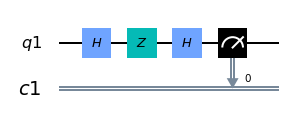

In [14]:
circuit.draw('mpl')

In [15]:
provider = IBMQ.get_provider(hub='ibm-q')
#device = provider.get_backend('ibmq_vigo')

In [17]:
FidelityFull1=[]
FidelityPartial1=[]
FidelityNoisy1=[]

JobIDFull1=[]
JobIDPartial1=[]
JobID_DJA1=[]

MatrixFull1=[]
MatrixPartial1=[]

In [19]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)
cal_circuits, state_labels = complete_meas_cal(qr=circuit.qregs[0], 
                                               circlabel='measurement_calibration')
device = provider.get_backend('ibmq_burlington')
bit='1'

for j in range (0,14):
    
    Trials=2**j  
    #Trials=8192
    
    job = execute(circuit, backend=device, shots=Trials)
    device_result = job.result()
    a=device_result.get_counts(circuit).get(bit)
    
    
    cal_job = execute(cal_circuits,
             backend=device,
             shots=Trials,
             optimization_level=0)
    #print(cal_job.job_id())

    cal_results = cal_job.result()

    index=2**n-1
    cal_job_partial = execute(cal_circuits[index],
             backend=device,
             shots=Trials,
             optimization_level=0)
    cal_results_partial = cal_job_partial.result()
    #JobIDPartial.append(cal_job_partial.job_id())
   
    meas_fitter = CompleteMeasFitter(cal_results, state_labels)
    meas_fitter_partial = CompleteMeasFitter(cal_results_partial, state_labels)
    for k in range (2**n-1):
        meas_fitter_partial.cal_matrix[k,k]=1
        
    
    meas_filter_partial =meas_fitter_partial.filter
    mitigated_result_partial = meas_filter_partial.apply(device_result)
    mitigated_counts_partial = mitigated_result_partial.get_counts(circuit)
    
    meas_filter =meas_fitter.filter
    mitigated_result = meas_filter.apply(device_result)
    mitigated_counts = mitigated_result.get_counts(circuit)
    
    FidelityNoisy1.append(device_result.get_counts(circuit).get(bit)/Trials)
    FidelityPartial1.append(mitigated_counts_partial.get(bit)/Trials)
    FidelityFull1.append(mitigated_counts.get(bit)/Trials)
    
    JobIDFull1.append("'"+str(cal_job.job_id())+"'")
    JobIDPartial1.append("'"+str(cal_job_partial.job_id())+"'")
    JobID_DJA1.append("'"+str(job.job_id())+"'")
    
    MatrixFull1.append(meas_fitter.cal_matrix)
    MatrixPartial1.append(meas_fitter_partial.cal_matrix)

Unexpected exception in keepalive ping task
Traceback (most recent call last):
  File "C:\Users\kumik\Anaconda3\lib\site-packages\websockets\protocol.py", line 984, in keepalive_ping
    ping_waiter = yield from self.ping()
  File "C:\Users\kumik\Anaconda3\lib\site-packages\websockets\protocol.py", line 583, in ping
    yield from self.ensure_open()
  File "C:\Users\kumik\Anaconda3\lib\site-packages\websockets\protocol.py", line 658, in ensure_open
    ) from self.transfer_data_exc
websockets.exceptions.ConnectionClosed: WebSocket connection is closed: code = 4002 (private use), no reason


In [22]:
def MatlabStr(array):
    return '[' + "; ".join(" ".join("%6g" % val for val in line) for line in array) + ']'

In [23]:
print(FidelityFull1)
print(FidelityPartial1)
print(FidelityNoisy1)

print(JobIDFull1)
print(JobIDPartial1)
print(JobID_DJA1)

print(MatrixFull1)
print(MatrixPartial1)

[1.0, 0.9999999999999998, 0.9999999999999992, 1.0, 1.0, 0.933333333375066, 0.9508196735010277, 0.983739837403985, 0.9999999999976452, 0.9979253108582936, 0.9999999999849767, 0.9873031994312859, 1.0, 0.9999999999999997]
[1.0, 0.9999999999999996, 1.0, 0.8750000002109121, 1.0, 0.9062499999631913, 0.9677419355013869, 0.9999999999998752, 0.9959183673533787, 0.9999999999963406, 0.9969696969671541, 0.9984763839504835, 1.0, 0.9935963111997713]
[1.0, 1.0, 1.0, 0.875, 1.0, 0.90625, 0.9375, 0.953125, 0.953125, 0.958984375, 0.9638671875, 0.9599609375, 0.94482421875, 0.947021484375]
["'5f2b3d490927b800133f960e'", "'5f2b3dbb0ca1ba0011b3d176'", "'5f2b3e12159e2600136cbb53'", "'5f2b3e500927b800133f9617'", "'5f2b3e980ca1ba0011b3d181'", "'5f2b3ee34ae7da001b3740a5'", "'5f2b3f31159e2600136cbb61'", "'5f2b3f845b470a00125d4462'", "'5f2b3fdd4ae7da001b3740ae'", "'5f2b4044cbff540019b42c02'", "'5f2b40cacbff540019b42c0c'", "'5f2b4195c79cc2001a3ac63b'", "'5f2b42a89b21aa001a1ca7f7'", "'5f2b4309159e2600136cbb92'"]
["

# Full

In [26]:
for j in MatrixFull1:
    print(MatlabStr(j))

[     1      0;      0      1]
[     1      0;      0      1]
[     1      0;      0      1]
[     1  0.125;      0  0.875]
[     1      0;      0      1]
[0.96875 0.03125; 0.03125 0.96875]
[0.96875 0.015625; 0.03125 0.984375]
[0.992188 0.03125; 0.0078125 0.96875]
[0.988281 0.0507812; 0.0117188 0.949219]
[0.980469 0.0390625; 0.0195312 0.960938]
[0.988281 0.0400391; 0.0117188 0.959961]
[0.989258 0.027832; 0.0107422 0.972168]
[0.982422 0.0593262; 0.0175781 0.940674]
[0.980103 0.0550537; 0.0198975 0.944946]


# Partial

In [27]:
for j in MatrixPartial1:
    print(MatlabStr(j))

[     1      0;      0      1]
[     1      0;      0      1]
[     1      0;      0      1]
[     1      0;      0      1]
[     1      0;      0      1]
[     1      0;      0      1]
[     1 0.03125;      0 0.96875]
[     1 0.046875;      0 0.953125]
[     1 0.0429688;      0 0.957031]
[     1 0.046875;      0 0.953125]
[     1 0.0332031;      0 0.966797]
[     1 0.0385742;      0 0.961426]
[     1 0.0598145;      0 0.940186]
[     1 0.046875;      0 0.953125]


In [ ]:
1 Qubit

Full mitigated matrices

N=1

      1      0
      0      1
        
N=2        

      1      0
      0      1
        
N=4

      1      0
      0      1

N=8

      1  0.125
      0  0.875
        
N=16

      1      0
      0      1
        
N=32

 0.96875 0.03125
 0.03125 0.96875

N=64

 0.96875 0.015625
 0.03125 0.984375

N=128

 0.992188 0.03125
 0.0078125 0.96875

N=256

 0.988281 0.0507812
 0.0117188 0.949219

N=512

 0.980469 0.0390625
 0.0195312 0.960938

N=1024

 0.988281 0.0400391
 0.0117188 0.959961

N=2048
    
 0.989258 0.027832
 0.0107422 0.972168
    
N=4096    

 0.982422 0.0593262
 0.0175781 0.940674 

N=8192

 0.980103 0.0550537
 0.0198975 0.944946 


Partially mitigated matrices:
    
N=1

      1      0
      0      1

N=2

      1      0
      0      1
        
N=4

      1      0
      0      1
        
N=8

      1      0
      0      1
    
N=16

      1      0
      0      1

N=32

      1      0
      0      1
        
N=64

      1 0.03125
      0 0.96875

N=128

      1 0.046875
      0 0.953125
        
N=256

      1 0.0429688
      0 0.957031
        
N=512

      1 0.046875
      0 0.953125
    
N=1024

      1 0.0332031
      0 0.966797
        
N=2048

      1 0.0385742
      0 0.961426

N=4096 

      1 0.0598145
      0 0.940186

N=8192

      1 0.046875
      0 0.953125

In [3]:
A=[[[1., 0.],
       [0., 1.]], [[1., 0.],
       [0., 1.]], [[1., 0.],
       [0., 1.]], [[1.   , 0.125],
       [0.   , 0.875]], [[1., 0.],
       [0., 1.]], [[0.96875, 0.03125],
       [0.03125, 0.96875]], [[0.96875 , 0.015625],
       [0.03125 , 0.984375]], [[0.9921875, 0.03125  ],
       [0.0078125, 0.96875  ]], [[0.98828125, 0.05078125],
       [0.01171875, 0.94921875]],[[0.98046875, 0.0390625 ],
       [0.01953125, 0.9609375 ]], [[0.98828125, 0.04003906],
       [0.01171875, 0.95996094]], [[0.98925781, 0.02783203],
       [0.01074219, 0.97216797]], [[0.98242188, 0.05932617],
       [0.01757812, 0.94067383]], [[0.98010254, 0.05505371],
       [0.01989746, 0.94494629]]]


# Full Mitigated 8 august format

In [5]:
def MatlabStr(array):
    return  "       ".join(" ".join("%f" % float(val) for val in line) for line in array)

for j in A:
    print(MatlabStr(j))

1.000000 0.000000       0.000000 1.000000
1.000000 0.000000       0.000000 1.000000
1.000000 0.000000       0.000000 1.000000
1.000000 0.125000       0.000000 0.875000
1.000000 0.000000       0.000000 1.000000
0.968750 0.031250       0.031250 0.968750
0.968750 0.015625       0.031250 0.984375
0.992188 0.031250       0.007812 0.968750
0.988281 0.050781       0.011719 0.949219
0.980469 0.039062       0.019531 0.960938
0.988281 0.040039       0.011719 0.959961
0.989258 0.027832       0.010742 0.972168
0.982422 0.059326       0.017578 0.940674
0.980103 0.055054       0.019897 0.944946


In [15]:
clear

In [ ]:
1.000000 0.000000 % N=1 shot 
0.000000 1.000000

1.000000 0.000000 % N=2 shots 
0.000000 1.000000

1.000000 0.000000 % N=4 shots 
0.000000 1.000000

1.000000 0.125000 % N=8 shots 
0.000000 0.875000

1.000000 0.000000 % N=16 shots 
0.000000 1.000000

0.968750 0.031250 % N=32 shots
0.031250 0.968750

0.968750 0.015625 % N=64 shots 
0.031250 0.984375

0.992188 0.031250 % N=128 shots 
0.007812 0.968750

0.988281 0.050781 % N=256 shots 
0.011719 0.949219

0.980469 0.039062 % N=512 shots 
0.019531 0.960938

0.988281 0.040039 % N=1024 shots 
0.011719 0.959961

0.989258 0.027832 % N=2048 shots 
0.010742 0.972168

0.982422 0.059326 % N=4096 shots 
0.017578 0.940674

0.980103 0.055054 % N=8192 shots 
0.019897 0.944946

In [14]:
clear

In [ ]:
1.000000 0.000000 % N=1 shot
0.000000 1.000000

1.000000 0.000000 % N=2 shot
0.000000 1.000000

1.000000 0.000000 % N=4 shot
0.000000 1.000000

1.000000 0.000000 % N=8 shot
0.000000 1.000000

1.000000 0.000000 % N=16 shot
0.000000 1.000000

1.000000 0.000000 % N=32 shot
0.000000 1.000000

1.000000 0.031250 % N=64 shot
0.000000 0.968750

1.000000 0.046875 % N=128 shot
0.000000 0.953125

1.000000 0.042969 % N=256 shot
0.000000 0.957031

1.000000 0.046875 % N=512 shot
0.000000 0.953125

1.000000 0.033203 % N=1024 shot
0.000000 0.966797

1.000000 0.038574 % N=2048 shot
0.000000 0.961426

1.000000 0.059814 % N=4096 shot
0.000000 0.940186

1.000000 0.046875 % N=8192 shot
0.000000 0.953125

In [18]:

def MatlabStr(array):
    return  "       ".join(" ".join("%f" % float(val) for val in line) for line in array)
w=0
    
for j in A:
    print(MatlabStr(j))
    if w==0:
        print("% N="+str(2**w)+" shot")
    else:
        print("% N="+str(2**w)+" shots")
    w=w+1




1.000000 0.000000       0.000000 1.000000
% N=1 shot
1.000000 0.000000       0.000000 1.000000
% N=2 shots
1.000000 0.000000       0.000000 1.000000
% N=4 shots
1.000000 0.000000       0.000000 1.000000
% N=8 shots
1.000000 0.000000       0.000000 1.000000
% N=16 shots
1.000000 0.000000       0.000000 1.000000
% N=32 shots
1.000000 0.031250       0.000000 0.968750
% N=64 shots
1.000000 0.046875       0.000000 0.953125
% N=128 shots
1.000000 0.042969       0.000000 0.957031
% N=256 shots
1.000000 0.046875       0.000000 0.953125
% N=512 shots
1.000000 0.033203       0.000000 0.966797
% N=1024 shots
1.000000 0.038574       0.000000 0.961426
% N=2048 shots
1.000000 0.059814       0.000000 0.940186
% N=4096 shots
1.000000 0.046875       0.000000 0.953125
% N=8192 shots


In [18]:
A=[[[1., 0.],
       [0., 1.]], [[1., 0.],
       [0., 1.]], [[1., 0.],
       [0., 1.]], [[1.   , 0.125],
       [0.   , 0.875]], [[1., 0.],
       [0., 1.]], [[0.96875, 0.03125],
       [0.03125, 0.96875]], [[0.96875 , 0.015625],
       [0.03125 , 0.984375]], [[0.9921875, 0.03125  ],
       [0.0078125, 0.96875  ]], [[0.98828125, 0.05078125],
       [0.01171875, 0.94921875]],[[0.98046875, 0.0390625 ],
       [0.01953125, 0.9609375 ]], [[0.98828125, 0.04003906],
       [0.01171875, 0.95996094]], [[0.98925781, 0.02783203],
       [0.01074219, 0.97216797]], [[0.98242188, 0.05932617],
       [0.01757812, 0.94067383]], [[0.98010254, 0.05505371],
       [0.01989746, 0.94494629]]]

In [24]:
def stand7(w):
    if len(str(w))<9:
        return str(w)+(9-len(str(w)))*"0"  
    else:
        return str(w)[:9] 

def G7(A):
    logN=0
    for Matr in A:
        w=0
        for j in Matr:
            prnt=''
            for k in j:
                prnt=prnt+stand7(k)+" "
            if w==0:
                if logN==0:
                    prnt=prnt+"% N="+str(2**logN)+" shot"
                else:
                    prnt=prnt+"% N="+str(2**logN)+" shots"
            w=w+1
            print(prnt)
        logN=logN+1
        print('')

In [25]:
G7(A)

1.0000000 0.0000000 % N=1 shot
0.0000000 1.0000000 

1.0000000 0.0000000 % N=2 shots
0.0000000 1.0000000 

1.0000000 0.0000000 % N=4 shots
0.0000000 1.0000000 

1.0000000 0.0000000 % N=8 shots
0.0000000 1.0000000 

1.0000000 0.0000000 % N=16 shots
0.0000000 1.0000000 

1.0000000 0.0000000 % N=32 shots
0.0000000 1.0000000 

1.0000000 0.0312500 % N=64 shots
0.0000000 0.9687500 

1.0000000 0.0468750 % N=128 shots
0.0000000 0.9531250 

1.0000000 0.0429687 % N=256 shots
0.0000000 0.9570312 

1.0000000 0.0468750 % N=512 shots
0.0000000 0.9531250 

1.0000000 0.0332031 % N=1024 shots
0.0000000 0.9667968 

1.0000000 0.0385742 % N=2048 shots
0.0000000 0.9614257 

1.0000000 0.0598144 % N=4096 shots
0.0000000 0.9401855 

1.0000000 0.0468750 % N=8192 shots
0.0000000 0.9531250 



In [27]:
A=[[[1., 0.],
       [0., 1.]], [[1., 0.],
       [0., 1.]], [[1., 0.],
       [0., 1.]], [[1.   , 0.125],
       [0.   , 0.875]], [[1., 0.],
       [0., 1.]], [[0.96875, 0.03125],
       [0.03125, 0.96875]], [[0.96875 , 0.015625],
       [0.03125 , 0.984375]], [[0.9921875, 0.03125  ],
       [0.0078125, 0.96875  ]], [[0.98828125, 0.05078125],
       [0.01171875, 0.94921875]], [[0.98046875, 0.0390625 ],
       [0.01953125, 0.9609375 ]], [[0.98828125, 0.04003906],
       [0.01171875, 0.95996094]], [[0.98925781, 0.02783203],
       [0.01074219, 0.97216797]], [[0.98242188, 0.05932617],
       [0.01757812, 0.94067383]], [[0.98010254, 0.05505371],
       [0.01989746, 0.94494629]]]

In [28]:
G7(A)

1.0000000 0.0000000 % N=1 shot
0.0000000 1.0000000 

1.0000000 0.0000000 % N=2 shots
0.0000000 1.0000000 

1.0000000 0.0000000 % N=4 shots
0.0000000 1.0000000 

1.0000000 0.1250000 % N=8 shots
0.0000000 0.8750000 

1.0000000 0.0000000 % N=16 shots
0.0000000 1.0000000 

0.9687500 0.0312500 % N=32 shots
0.0312500 0.9687500 

0.9687500 0.0156250 % N=64 shots
0.0312500 0.9843750 

0.9921875 0.0312500 % N=128 shots
0.0078125 0.9687500 

0.9882812 0.0507812 % N=256 shots
0.0117187 0.9492187 

0.9804687 0.0390625 % N=512 shots
0.0195312 0.9609375 

0.9882812 0.0400390 % N=1024 shots
0.0117187 0.9599609 

0.9892578 0.0278320 % N=2048 shots
0.0107421 0.9721679 

0.9824218 0.0593261 % N=4096 shots
0.0175781 0.9406738 

0.9801025 0.0550537 % N=8192 shots
0.0198974 0.9449462 

